In [1]:
import pennylane as qml
import numpy as np
import jax
jax.config.update("jax_enable_x64", True)
import jax.numpy as jnp
import matplotlib.pyplot as plt



In [2]:
num_wires = 2
wires = list(range(num_wires))
np.random.seed(62213)

coefficients = np.random.randn(4**num_wires - 1)
# Create the matrices for the entire Pauli basis
basis = qml.ops.qubit.special_unitary.pauli_basis_matrices(num_wires)
# Construct the Hamiltonian from the normal random coefficients and the basis
A_matrix = qml.math.tensordot(coefficients, basis, axes=[[0], [0]])
# Perform the QR decomposition
Q, R = np.linalg.qr(A_matrix)  # QR decomposition

Q

B = np.array([1, 0, 0, 0])

rho_b = qml.math.dm_from_state_vector(B)

### Why A is Unitary and X, B are Quantum States

- **Matrix A as Unitary**: Unitary matrices preserve the norm of quantum states and ensure reversible transformations.
- **X and B as Quantum States**: $$X$$ and $$B$$ represent quantum states, which are vectors in a Hilbert space. The optimization seeks a solution state $$|X(\theta)\rangle$$ that approximates the target state $$|B\rangle$$.


In [3]:
init_param = np.random.rand(15)
init_param

array([0.27802081, 0.19342159, 0.03529379, 0.697337  , 0.02911846,
       0.45587612, 0.52262351, 0.85525314, 0.72094463, 0.85818196,
       0.48358937, 0.34442212, 0.09149995, 0.59647456, 0.54765518])

### Mathematical Operations on the Circuit

1. **Initial state**: The system starts in the state **|00>**.
2. **Pauli-X gate**: The **X** gate flips the second qubit, transforming **|00>** to **|01>**.
3. **SpecialUnitary gate**: This gate applies a unitary transformation with random parameters **params**, modifying the state.
4. **QubitUnitary (Q)**: The **Q** gate applies a unitary operation **Q** to the state, further transforming it.

### Cost Function (Fidelity Between End State and B)

The **cost function** is the negative fidelity between the final state and the target state **|00>**. Fidelity is a measure of similarity between two quantum states, defined as:
$$
F(\rho, \sigma) = |\langle \psi_{\text{target}} | \psi_{\text{final}} \rangle|^2
$$
The optimization process adjusts the parameters of the **SpecialUnitary** gate to maximize this fidelity, minimizing the cost (negative fidelity) to bring the final state closer to **|00>**.



In [4]:
#initialize state 01 and then multiply special unitary(init_params) and then multiply A Unitary and output the state! 
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def circuit(params):
    # Step 0: Initialize state |01> by applying X gate on wire 1
    qml.PauliX(wires=1)
    qml.SpecialUnitary(params, wires=wires)
    # apply Q unitary
    qml.QubitUnitary(Q, wires=wires)
    return qml.state()
    

# Define the cost function
def cost_function(params):
    X = qml.math.dm_from_state_vector(circuit(params))
    # X_dag = np.matmul(A_matrix, X)
    # rho_X_dag_A = qml.math.dm_from_state_vector(X_dag)
    return 1- qml.math.fidelity(X, rho_b)

In [5]:
# Optimization function using JAX
def optimize(num_steps=500, learning_rate=0.01):
    """Optimize parameters using JAX differentiation."""
    num_steps = 500
    grad_fn = jax.jit(jax.grad(cost_function))  # Compute gradient
    params = init_param  # Ensure it's a JAX array
    energies = []

    for step in range(num_steps):
        cost = cost_function(params)
        grads = grad_fn(params)  # Compute gradients
        
        if step % 10 == 0:  # Print gradient values every 10 steps
            print(f"Iteration {step}: Fidelity = {-cost:.6f}")        
        params = params - learning_rate * grads  # Update parameters
        energies.append(cost)
    # Plot the energy evolution
    plt.plot(range(num_steps), energies, label="Energy")
    plt.xlabel("Iteration")
    plt.ylabel("Cost Function Value")
    plt.title("Optimization Progress")
    plt.legend()
    plt.show()
    return params, energies

c:\Users\DELL\anaconda3\envs\qiskit\Lib\site-packages\jax\_src\lax\lax.py:2745: ComplexWarning: Casting complex values to real discards the imaginary part
  x_bar = _convert_element_type(x_bar, x.aval.dtype, x.aval.weak_type)


Iteration 0: Fidelity = -0.688684
Iteration 10: Fidelity = -0.570238
Iteration 20: Fidelity = -0.446303
Iteration 30: Fidelity = -0.331821
Iteration 40: Fidelity = -0.236813
Iteration 50: Fidelity = -0.164133
Iteration 60: Fidelity = -0.111578
Iteration 70: Fidelity = -0.074936
Iteration 80: Fidelity = -0.049962
Iteration 90: Fidelity = -0.033173
Iteration 100: Fidelity = -0.021979
Iteration 110: Fidelity = -0.014550
Iteration 120: Fidelity = -0.009632
Iteration 130: Fidelity = -0.006379
Iteration 140: Fidelity = -0.004229
Iteration 150: Fidelity = -0.002806
Iteration 160: Fidelity = -0.001864
Iteration 170: Fidelity = -0.001240
Iteration 180: Fidelity = -0.000826
Iteration 190: Fidelity = -0.000551
Iteration 200: Fidelity = -0.000369
Iteration 210: Fidelity = -0.000247
Iteration 220: Fidelity = -0.000165
Iteration 230: Fidelity = -0.000111
Iteration 240: Fidelity = -0.000075
Iteration 250: Fidelity = -0.000050
Iteration 260: Fidelity = -0.000034
Iteration 270: Fidelity = -0.000023
Ite

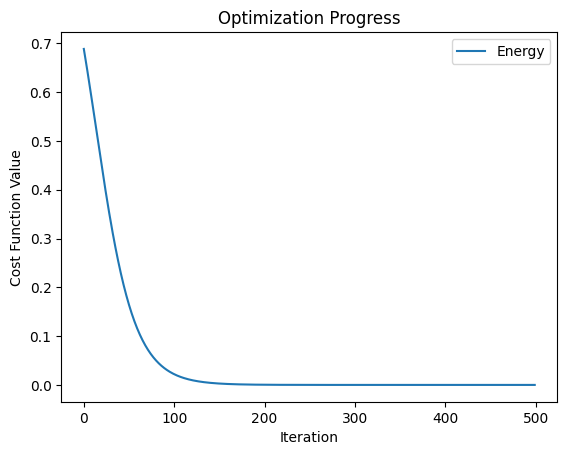

In [6]:
opt_val = optimize(init_param)[0]

In [7]:
x  = np.round(circuit(opt_val), 4)

x

Array([ 0.9602-0.2794j, -0.    -0.j    ,  0.    +0.j    ,  0.    -0.j    ],      dtype=complex128)

In [8]:
from qiskit import QuantumCircuit

In [11]:
\psi = QuantumCircuit(2)\𝐩𝐬𝐢


SyntaxError: unexpected character after line continuation character (1711351322.py, line 1)

In [ ]:
\